In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("/kaggle/input/story-dataset/user_interaction.csv")

In [18]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   pratilipi_id  int64  
 2   read_percent  float64
 3   updated_at    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 76.3+ MB


In [19]:
print(df.isnull().sum())  

user_id         0
pratilipi_id    0
read_percent    0
updated_at      0
dtype: int64


No missing values in user_interaction Dataset

In [20]:
print(f"Unique Values of pratilipi_id : {df['pratilipi_id'].nunique()}")
print(f"Unique User : {df['user_id'].nunique()}")            

Unique Values of pratilipi_id : 241405
Unique User : 243606


The dataset contains 241,405 unique pratilipi_id entries and 243,606 unique users out of 250,000 total records.

<Axes: ylabel='read_percent'>

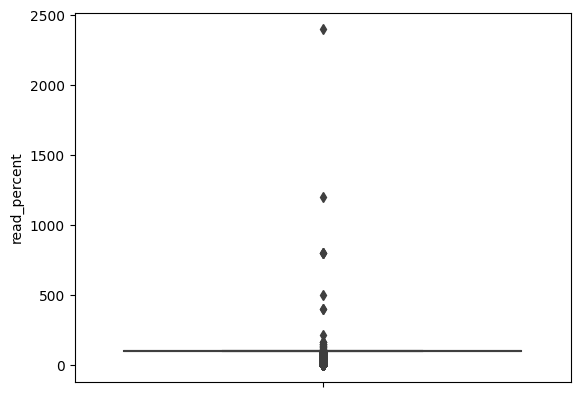

In [21]:
sns.boxplot(y=df['read_percent'])

In [22]:
df[df["read_percent"]>100].head()

,user_id,pratilipi_id,read_percent,updated_at
158435,5506791972061623,1377786216692750,125.000000,2022-03-22 10:13:51.047
245007,5506791974012382,379249622685384,150.000000,2022-03-22 15:18:03.584
400064,5506791968565716,1377786217740496,400.000000,2022-03-22 01:13:27.237
678885,5506791961717276,1377786216901040,800.000000,2022-03-18 17:35:12.636
780686,5506791952337656,1377786216853266,166.666667,2022-03-18 19:08:01.676


In [23]:
print(f"Max value of read_percent: {df['read_percent'].max()}")
print(f"Min value of read_percent: {df['read_percent'].min()}") 

Max value of read_percent: 2400.0
Min value of read_percent: 0.0


In [24]:
median = df.loc[(df['read_percent'] >= 0) & (df['read_percent'] <= 100), 'read_percent'].median()
df['read_percent'] = df['read_percent'].apply(lambda x: median if x > 100 else x) 

In [25]:
print(f"Max value of read_percent: {df['read_percent'].max()}")
print(f"Min value of read_percent: {df['read_percent'].min()}") 

Max value of read_percent: 100.0
Min value of read_percent: 0.0


Values greater than 100 are considered outliers, so they were converted to the range of 0 to 100, and the median was then calculated.

In [26]:
df.drop(['updated_at'],axis = 1,inplace = True) 
df

,user_id,pratilipi_id,read_percent
0,5506791961876448,1377786228262109,100.0
1,5506791971543560,1377786223038206,40.0
2,5506791996468218,1377786227025240,100.0
3,5506791978752866,1377786222398208,65.0
4,5506791978962946,1377786228157051,100.0
...,...,...,...
2499995,5506791965506371,1377786228243175,100.0
2499996,5506791966125995,1377786221431279,100.0
2499997,5506791964496442,1377786226829597,100.0
2499998,5506791968781083,1377786226056467,100.0


In [27]:
df1 = pd.read_csv("/kaggle/input/story-metadata/metadata.csv")

In [28]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954501 entries, 0 to 954500
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   author_id      954501 non-null  int64 
 1   pratilipi_id   954501 non-null  int64 
 2   category_name  954501 non-null  object
 3   reading_time   954501 non-null  int64 
 4   updated_at     954501 non-null  object
 5   published_at   954494 non-null  object
dtypes: int64(3), object(3)
memory usage: 43.7+ MB


In [29]:
df1.drop(["published_at","updated_at"],axis = 1,inplace = True) 

In [36]:
print(f"Unique Values of pratilipi_id : {df1['pratilipi_id'].nunique()}")
print(f"Unique Author : {df1['author_id'].nunique()}")            
print(f"Total category : {df1['category_name'].nunique()}") 

Unique Values of pratilipi_id : 486693
Unique Author : 64900
Total category : 45


Out of 954,501 entries, there are 486,693 unique Pratilipi IDs and 64,900 unique authors  unique 45 categories.

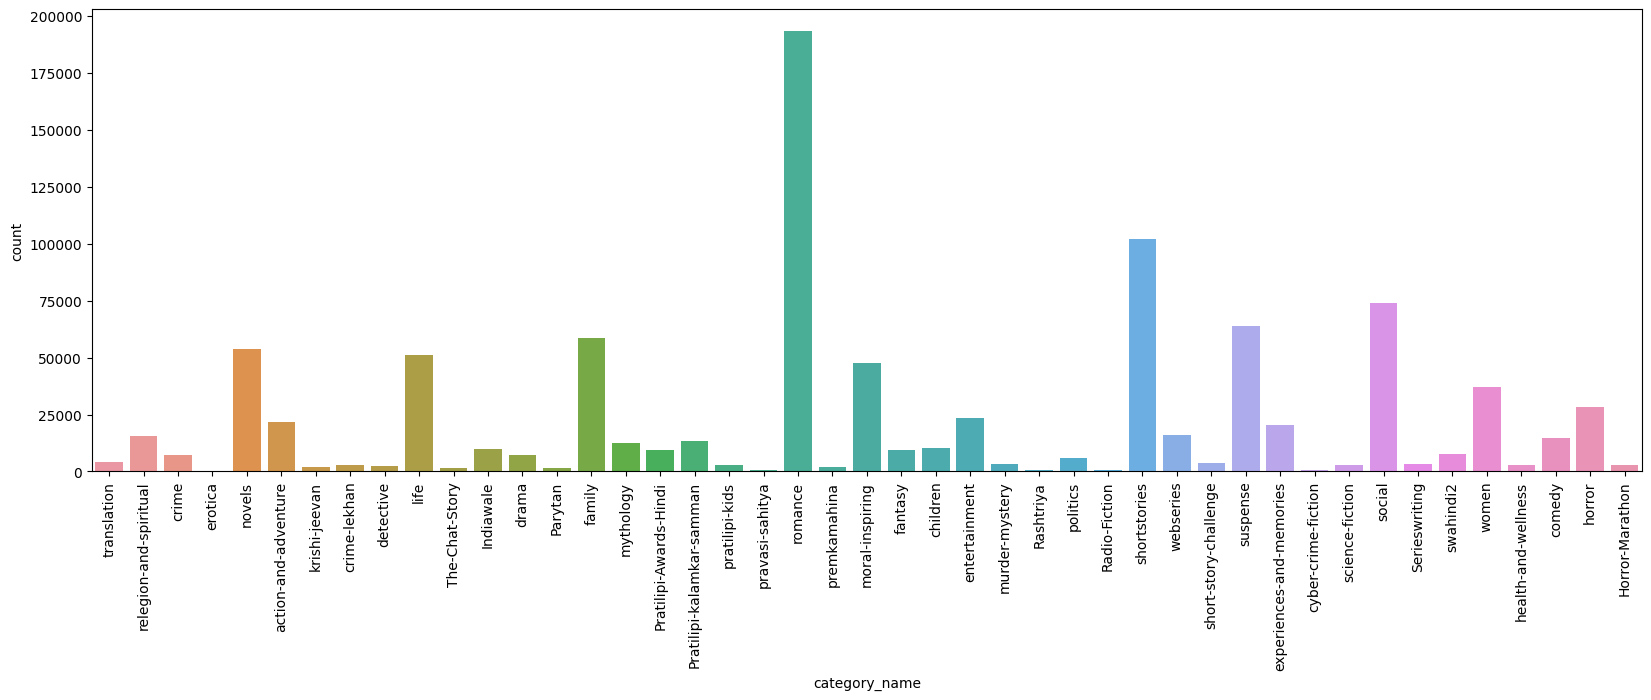

In [69]:
plt.figure(figsize=(20, 6))
sns.countplot(x= df1["category_name"])
plt.xticks(rotation=90)        
plt.show()

In [55]:
category_counts = df1['category_name'].value_counts()
max_category = category_counts.idxmax()
min_category = category_counts.idxmin()
print(f"Max count: {category_counts.max()} for category: {max_category}")
print(f"Min count: {category_counts.min()} for category: {min_category}")    

Max count: 193220 for category: romance
Min count: 363 for category: erotica


the highest count of 193,220 in "romance" and the lowest count of 363 in "erotica."

<Axes: >

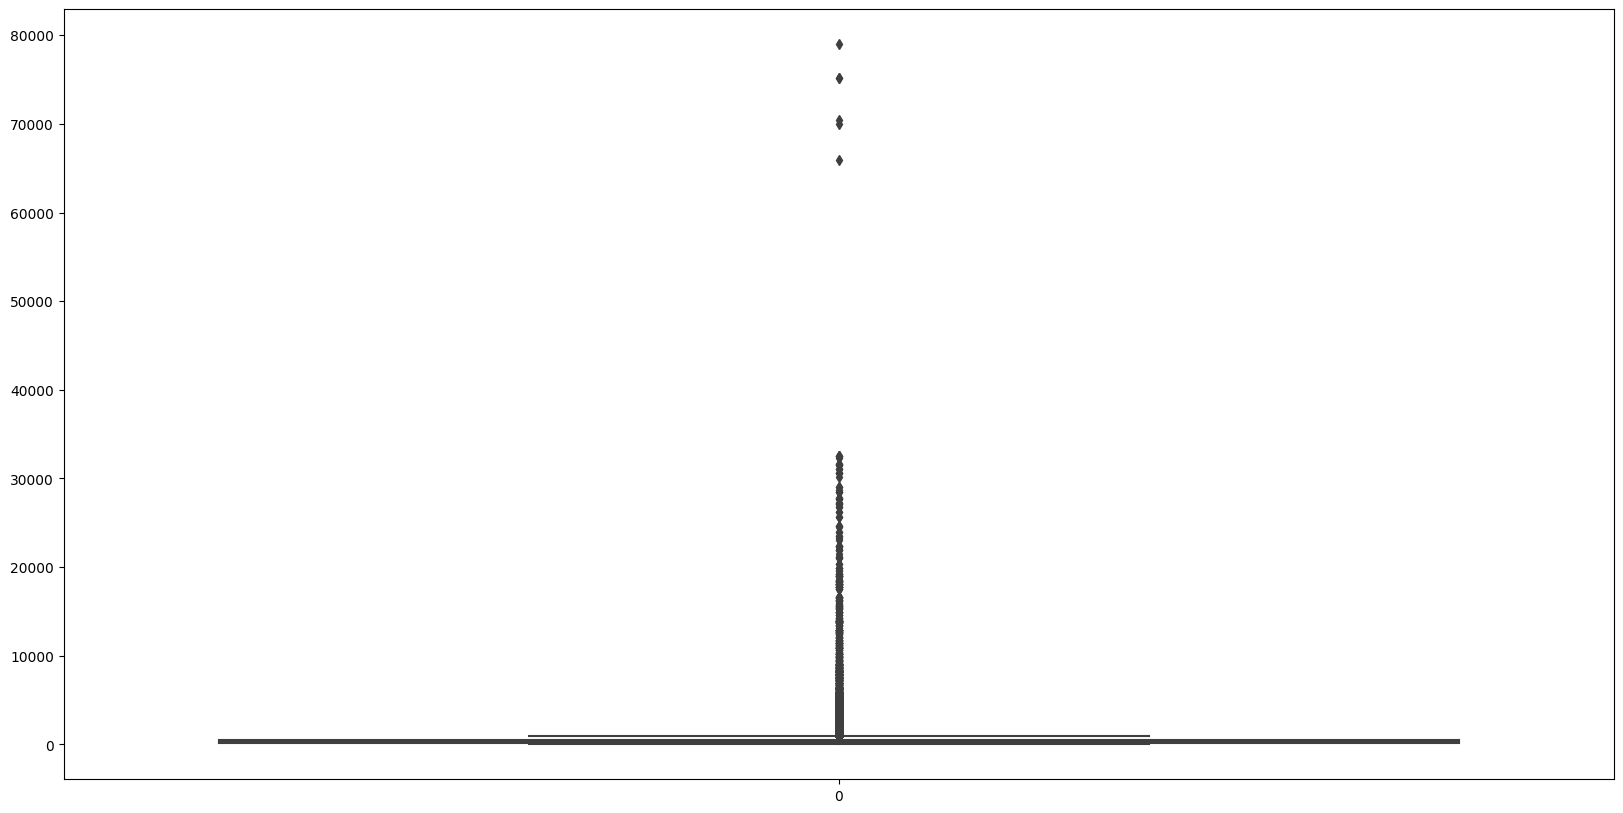

In [61]:
plt.figure(figsize = (20,10))
sns.boxplot(df1["reading_time"])     